In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 3)
from utils import *

In [2]:
DIR = "data/round-4/"

#### Analyse Round 3 performance

In [3]:
infile = DIR+"round3_final.log"
pnl_file = DIR+"round3.txt"

In [4]:
pnl = pd.read_csv(pnl_file, sep=";")
hist = get_tradehistory(infile)

SPREADS

In [5]:
cross_hist = get_mytrades(hist, "CROISSANTS")
jam_hist = get_mytrades(hist, "JAMS")
dj_hist =  get_mytrades(hist, "DJEMBES")
pb1_hist =  get_mytrades(hist, "PICNIC_BASKET1")
pb2_hist =  get_mytrades(hist, "PICNIC_BASKET2")

In [6]:
PB1 = pd.read_csv(DIR+"PICNIC_BASKET1.csv", sep=";")
PB2 = pd.read_csv(DIR+"PICNIC_BASKET2.csv", sep=";")
CROSS = pd.read_csv(DIR+"CROISSANTS.csv", sep=";")
JAM = pd.read_csv(DIR+"JAMS.csv", sep=";")
DJ = pd.read_csv(DIR+"DJEMBES.csv", sep=";")

day = 3
SPREAD1 = PB1.loc[PB1["day"]==day]["mid_price"].array - (6 * CROSS.loc[CROSS["day"]==day]["mid_price"].array 
                                                       + 3 * JAM.loc[JAM["day"]==day]["mid_price"].array
                                                       + DJ.loc[DJ["day"]==day]["mid_price"].array)
SPREAD2 = PB2.loc[PB2["day"]==day]["mid_price"].array - (4 * CROSS.loc[CROSS["day"]==day]["mid_price"].array 
                                                       + 2 * JAM.loc[JAM["day"]==day]["mid_price"].array)

IMPLIED_SPREAD1 = find_spread(PB1, (CROSS, JAM, DJ), 1)
IMPLIED_SPREAD2 = find_spread(PB2, (CROSS, JAM), 2)

In [7]:
spread1_hist = pd.DataFrame(columns=["timestamp", "buyer", "seller", "price", "quantity", "position"])
for _, dfhist in pb1_hist.iterrows():
    time = dfhist["timestamp"]
    price = dfhist["price"]
    df = cross_hist.loc[cross_hist["timestamp"]==time]
    price -= 6 * (df["price"] * df["quantity"]).sum() / df["quantity"].sum()
    df = jam_hist.loc[jam_hist["timestamp"]==time]
    price -= 3 * (df["price"] * df["quantity"]).sum() / df["quantity"].sum()
    df = dj_hist.loc[dj_hist["timestamp"]==3200]
    price -= (df["price"] * df["quantity"]).sum() / df["quantity"].sum()

    spread1_hist.loc[len(spread1_hist)] = [time, dfhist["buyer"], dfhist["seller"], price, dfhist["quantity"], dfhist["position"]]

spread2_hist = pd.DataFrame(columns=["timestamp", "buyer", "seller", "price", "quantity", "position"])
for _, dfhist in pb2_hist.iterrows():
    time = dfhist["timestamp"]

    price = dfhist["price"]
    df = cross_hist.loc[cross_hist["timestamp"]==time]
    price -= 4 * (df["price"] * df["quantity"]).sum() / df["quantity"].sum()
    df = jam_hist.loc[jam_hist["timestamp"]==time]
    price -= 2 * (df["price"] * df["quantity"]).sum() / df["quantity"].sum()
    
    spread2_hist.loc[len(spread2_hist)] = [time, dfhist["buyer"], dfhist["seller"], price, dfhist["quantity"], dfhist["position"]]

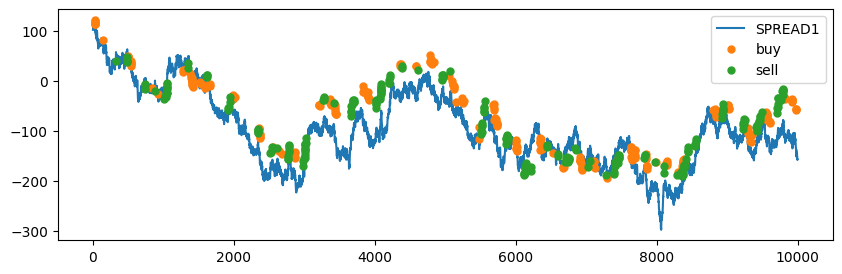

In [173]:
buy_time, sell_time, buy_price, sell_price = [], [], [], []

for _, df in spread1_hist.iterrows():
    if df["buyer"] == "SUBMISSION":
        buy_time.append(df["timestamp"]/100)
        buy_price.append(df["price"])
    elif df["seller"] == "SUBMISSION":
        sell_time.append(df["timestamp"]/100)
        sell_price.append(df["price"])

plt.plot(SPREAD1, label="SPREAD1")
plt.plot(buy_time, buy_price, lw=0, ms=10, marker=".", label="buy")
plt.plot(sell_time, sell_price, lw=0, ms=10, marker=".", label="sell")

plt.legend()

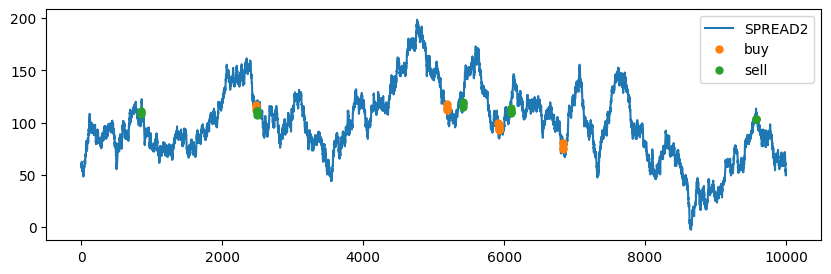

In [172]:
buy_time, sell_time, buy_price, sell_price = [], [], [], []

for _, df in spread2_hist.iterrows():
    if df["buyer"] == "SUBMISSION":
        buy_time.append(df["timestamp"]/100)
        buy_price.append(df["price"])
    elif df["seller"] == "SUBMISSION":
        sell_time.append(df["timestamp"]/100)
        sell_price.append(df["price"])

plt.plot(SPREAD2, label="SPREAD2")
plt.plot(buy_time, buy_price, lw=0, ms=10, marker=".", label="buy")
plt.plot(sell_time, sell_price, lw=0, ms=10, marker=".", label="sell")

plt.legend()

SQUID

In [174]:
squid_hist = get_mytrades(hist, "SQUID_INK")

In [176]:
SQUID = pd.read_csv(DIR+"SQUID.csv", sep=";")

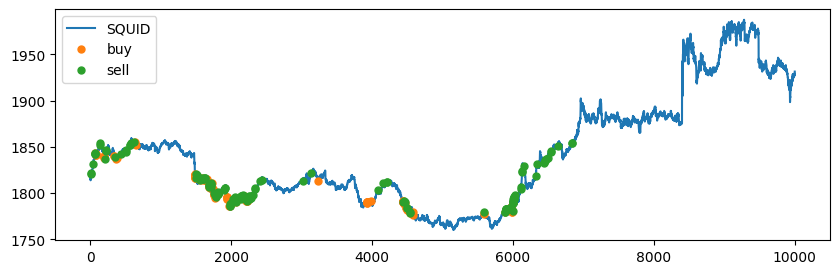

In [179]:
buy_time, sell_time, buy_price, sell_price = [], [], [], []

for _, df in squid_hist.iterrows():
    if df["buyer"] == "SUBMISSION":
        buy_time.append(df["timestamp"]/100)
        buy_price.append(df["price"])
    elif df["seller"] == "SUBMISSION":
        sell_time.append(df["timestamp"]/100)
        sell_price.append(df["price"])

plt.plot(SQUID.loc[SQUID["day"]==3]["mid_price"].array, label="SQUID")
plt.plot(buy_time, buy_price, lw=0, ms=10, marker=".", label="buy")
plt.plot(sell_time, sell_price, lw=0, ms=10, marker=".", label="sell")

plt.legend()

#### MACARONS

In [5]:
mac = "MAGNIFICENT_MACARONS"

In [6]:
MACARONS = pd.read_csv(DIR+"MACARONS.csv", sep=";")
OBS = pd.read_csv(DIR+"OBS.csv", sep=";")

In [76]:
day = 3
MACARONS_dayn = MACARONS.loc[MACARONS["day"]==day]
OBS_dayn = OBS.loc[OBS["day"]==day]

In [7]:
implied_ask, implied_bid = [], []
for (_, row1), (_, row2) in zip (MACARONS.iterrows(), OBS.iterrows()):
    local_ask = row1["ask_price_1"]
    local_bid = row1["bid_price_1"]
    implied_ask.append(row2["askPrice"] + row2["importTariff"] + row2["transportFees"] + 0.1)
    implied_bid.append(row2["bidPrice"] - row2["exportTariff"] - row2["transportFees"])

implied_ask = np.array(implied_ask)
implied_bid = np.array(implied_bid)

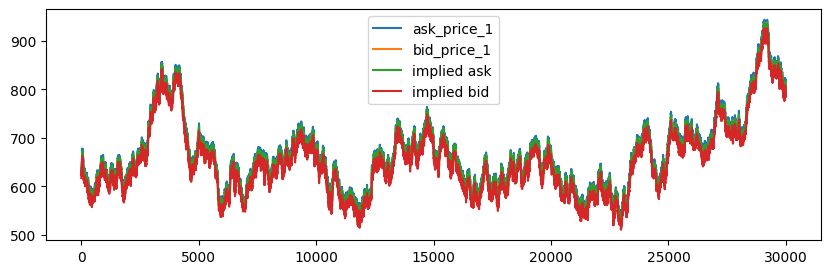

In [182]:
MACARONS["ask_price_1"].plot()
MACARONS["bid_price_1"].plot()
plt.plot(implied_ask, label="implied ask")
plt.plot(implied_bid, label="implied bid")
plt.legend()


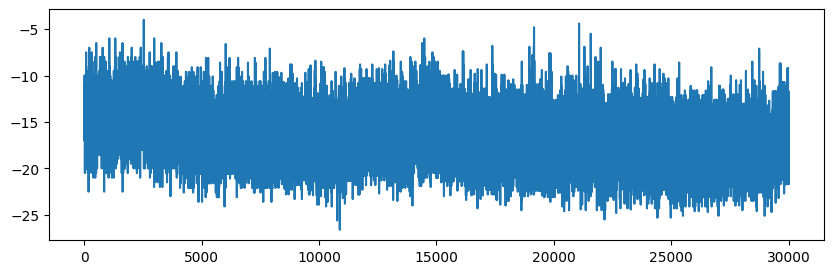

In [8]:
plt.plot(implied_bid[1:] - MACARONS["ask_price_1"].array[:-1])

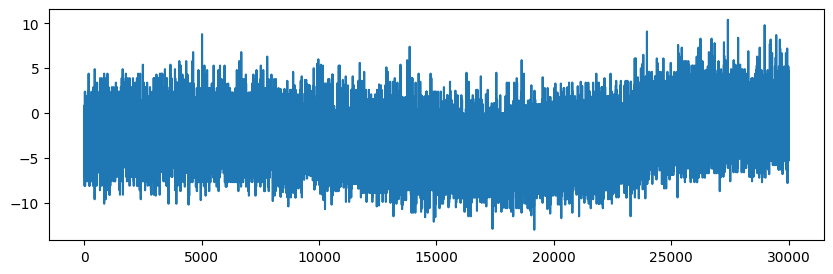

In [220]:
plt.plot(MACARONS["bid_price_1"].array[:-1] - implied_ask[1:])

In [28]:
sum(a < b for a, b in zip(implied_ask[1:], MACARONS["ask_price_1"].array[:-1]-2))/len(MACARONS)

np.float64(0.8729)

In [ ]:
sum(a < b for a, b in zip(implied_ask[1:], MACARONS["bid_price_1"].array[:-1]+2))/len(MACARONS)

np.float64(0.24796666666666667)

In [212]:
sum(a > b for a, b in zip(implied_bid[1:], MACARONS["ask_price_1"].array[:-1]))/len(MACARONS)

np.float64(0.0)

In [75]:
TIME = MACARONS["timestamp"].array

The only arbitrage is to import from Pristine and sell in the local exchange

In [61]:
export_count = 0
import_count = 0

for t in TIME:
    local_ask = MACARONS_dayn.loc[MACARONS_dayn["timestamp"]==t]["ask_price_1"].item()
    local_bid = MACARONS_dayn.loc[MACARONS_dayn["timestamp"]==t]["bid_price_1"].item()
    implied_ask = OBS_dayn.loc[OBS_dayn["timestamp"]==t]["askPrice"].item() + OBS_dayn.loc[OBS_dayn["timestamp"]==t]["importTariff"].item() + OBS_dayn.loc[OBS_dayn["timestamp"]==t]["transportFees"].item() + 0.1
    implied_bid = OBS_dayn.loc[OBS_dayn["timestamp"]==t]["bidPrice"].item() - OBS_dayn.loc[OBS_dayn["timestamp"]==t]["exportTariff"].item() - OBS_dayn.loc[OBS_dayn["timestamp"]==t]["transportFees"].item()

    if local_ask < implied_bid:
        export_count += 1
    elif local_bid > implied_ask:
        import_count += 1
    

print(export_count, import_count)

0 939


In [70]:
hist = get_tradehistory(DIR+"current.log")
trades = get_mytrades(hist, "MAGNIFICENT_MACARONS")

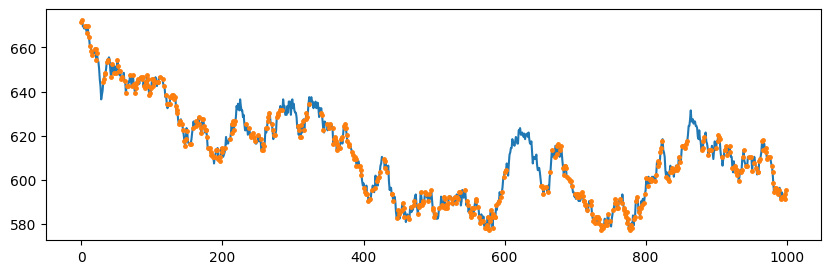

In [80]:
times = trades["timestamp"].unique()//100

plt.plot(MACARONS_dayn["mid_price"].array[:1000])
plt.plot(times, MACARONS_dayn["mid_price"].array[times], lw=0, ms=5, marker='.')

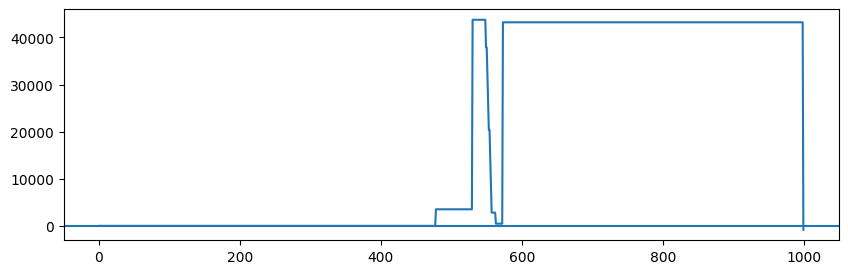

In [160]:
pnl_current = pd.read_csv("data/round-4/current.csv", sep=";")
pnl_current = pnl_current.loc[pnl_current["product"]=="MAGNIFICENT_MACARONS"].reset_index(drop=True)
pnl_current["profit_and_loss"].plot()
plt.axhline(0)

In [161]:
pnl_current.loc[pnl_current["product"]=="MAGNIFICENT_MACARONS"]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,3,0,MAGNIFICENT_MACARONS,667.0,16.0,665.0,15.0,658.0,26.0,676,8,685.0,26.0,692.0,15.0,671.5,0.0
1,3,100,MAGNIFICENT_MACARONS,668.0,20.0,666.0,18.0,659.0,25.0,677,10,686.0,25.0,693.0,18.0,672.5,0.0
2,3,200,MAGNIFICENT_MACARONS,665.0,10.0,662.0,15.0,656.0,21.0,670,6,674.0,5.0,683.0,21.0,667.5,0.0
3,3,300,MAGNIFICENT_MACARONS,665.0,12.0,662.0,13.0,656.0,26.0,674,6,683.0,26.0,689.0,13.0,669.5,0.0
4,3,400,MAGNIFICENT_MACARONS,664.0,20.0,662.0,18.0,655.0,28.0,673,10,682.0,28.0,689.0,18.0,668.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,99500,MAGNIFICENT_MACARONS,588.0,18.0,586.0,15.0,580.0,23.0,597,9,606.0,23.0,612.0,15.0,592.5,43206.0
996,3,99600,MAGNIFICENT_MACARONS,588.0,18.0,585.0,14.0,579.0,27.0,597,9,606.0,27.0,612.0,14.0,592.5,43206.0
997,3,99700,MAGNIFICENT_MACARONS,587.0,18.0,584.0,16.0,578.0,30.0,596,9,605.0,30.0,611.0,16.0,591.5,43206.0
998,3,99800,MAGNIFICENT_MACARONS,589.0,18.0,587.0,14.0,581.0,22.0,598,9,607.0,22.0,613.0,14.0,593.5,43206.0


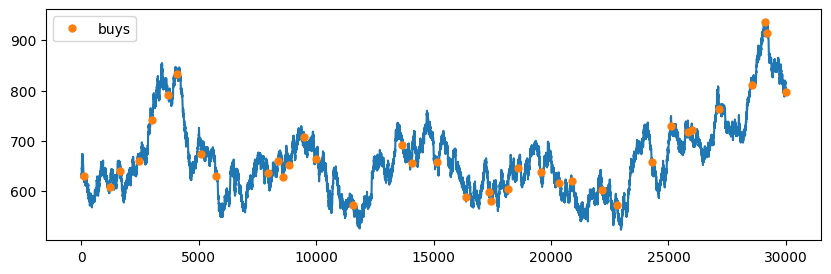

In [159]:
arr = MACARONS["mid_price"].array
sells, buys, strongsells, strongbuys = find_signal_zscore(arr, 10, 2.5, 5., 1, 50)
plt.plot(arr)
# plt.plot(sells, arr[sells], lw=0, ms=10, marker='.', label="sell")
plt.plot(buys, arr[buys], lw=0, ms=10, marker='.', label="buys")
# plt.plot(strongsells, arr[strongsells], lw=0, ms=10, marker='.', label="strongsells")
# plt.plot(strongbuys, arr[strongbuys], lw=0, ms=5, marker='.', label="strongbuys")
plt.legend()

# plt.xlim((0,5000))
# plt.ylim((550, 900))